In [100]:
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

df = pd.read_csv("datasets/ml_ready_set_unbalanced.csv")

In [101]:
df.head()

,PREVAILING_WAGE,WAGE_RATE_OF_PAY_FROM,wage_diff,applications_per_employer,employer_success_rate,decision_duration,employment_duration,regions_midwest,regions_northeast,regions_other,regions_south,regions_west,case_status_encoded,full_time_encoded
0,58032.0,58032.0,0.0,362,98.6,726,730,0,1,0,0,0,0,1
1,60967.0,95600.0,34633.0,50,96.0,506,1094,0,1,0,0,0,0,1
2,50398.0,60400.0,10002.0,362,98.6,331,364,0,1,0,0,0,0,1
3,61069.0,65000.0,3931.0,362,98.6,277,364,0,1,0,0,0,0,1
4,41392.0,49383.0,7991.0,362,98.6,219,364,0,1,0,0,0,0,1


In [138]:
target = df["case_status_encoded"]
df_model = df.drop("case_status_encoded", axis=1)
wage = df["wage_diff"]
wage.values.reshape(1,-1)
X_train, X_test, y_train, y_test = train_test_split(wage, target, test_size=0.30, random_state=42)
model = LogisticRegression()
classifier(model, X_train, X_test, y_train, y_test)

c:\users\jmeh9\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Expected 2D array, got 1D array instead:
array=[42966.   9146.  15900.5 ...     0.  14645.      0. ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [103]:
X_train.head()

,PREVAILING_WAGE,WAGE_RATE_OF_PAY_FROM,wage_diff,applications_per_employer,employer_success_rate,decision_duration,employment_duration,regions_midwest,regions_northeast,regions_other,regions_south,regions_west,full_time_encoded
593838,39062.0,47500.0,8438.0,198,99.0,7,729,1,0,0,0,0,1
359213,83366.0,83400.0,34.0,69,100.0,6,486,1,0,0,0,0,1
877947,39062.0,47507.0,8445.0,65,96.9,6,1095,0,0,0,0,1,1
594570,70034.0,77037.0,7003.0,9192,99.4,7,829,0,0,0,1,0,1
268322,77667.0,78000.0,333.0,97,100.0,4,1095,0,0,0,0,1,1


In [104]:
y_train.value_counts()

0    761114
1      9478
Name: case_status_encoded, dtype: int64

In [105]:
scaler = StandardScaler()
def scale_data(X_train, X_test):
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.fit_transform(X_test)
    return X_train_scaled, X_test_scaled

In [106]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [128]:
def classifier(model, X_train_scaled, X_test_scaled, y_train, y_test):
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    accuracy = metrics.accuracy_score(predictions,y_test)
    print ("Accuracy : %s" % "{0:.3%}".format(accuracy))
    cm = confusion_matrix(y_test, predictions)
    plot_confusion_matrix(cm, target_names=["0", "1"], title="Confusion Matrix", cmap=None, normalize=False)
    TP = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TN = cm[1][1]
    print("percentage of correct denial:" + str((TN / (FN + TN)) * 100))

In [ ]:
target = df["case_status_encoded"]
df_model = df.drop("case_status_encoded", axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_model, target, test_size=0.30, random_state=42)

c:\users\jmeh9\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\jmeh9\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
c:\users\jmeh9\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\jmeh9\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
c:\u

Accuracy : 99.068%


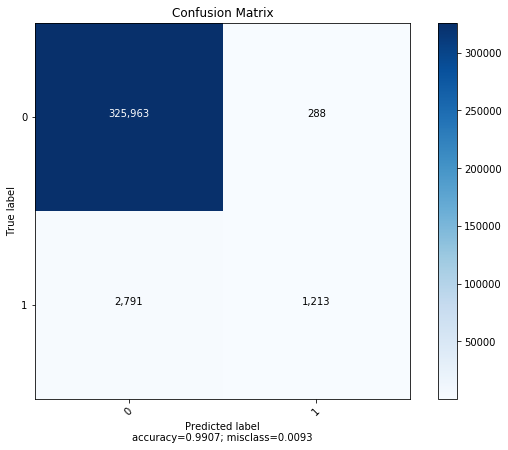

In [108]:
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)
model = LogisticRegression()
classifier(model, X_train_scaled, X_test_scaled, y_train, y_test)

Accuracy : 99.420%


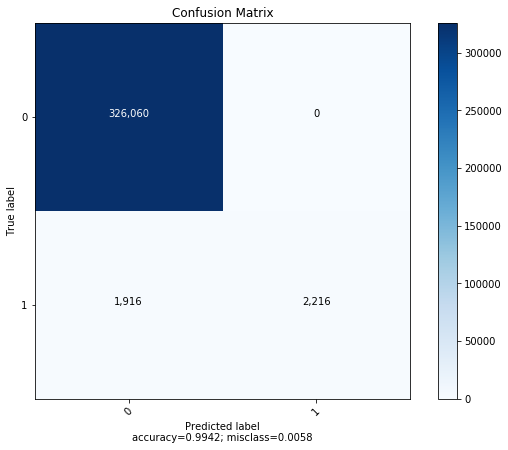

percentage of correct denial:53.63020329138431


In [130]:
model = RandomForestClassifier(n_estimators = 100 ,max_depth = 3)
classifier(model, X_train_scaled, X_test_scaled, y_train, y_test)

Accuracy : 99.532%


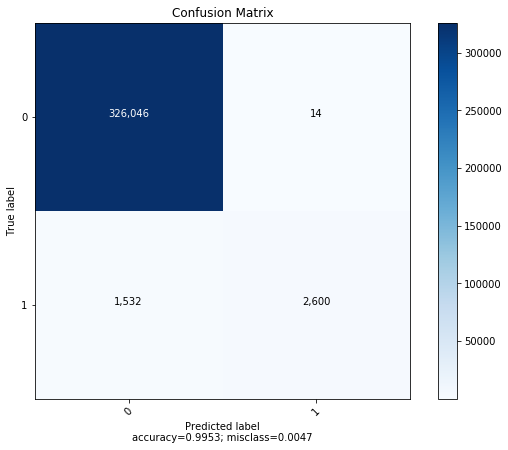

percentage of correct denial:62.923523717328166


In [129]:
model = RandomForestClassifier(n_estimators = 150 ,max_depth = 5)
classifier(model, X_train_scaled, X_test_scaled, y_train, y_test)

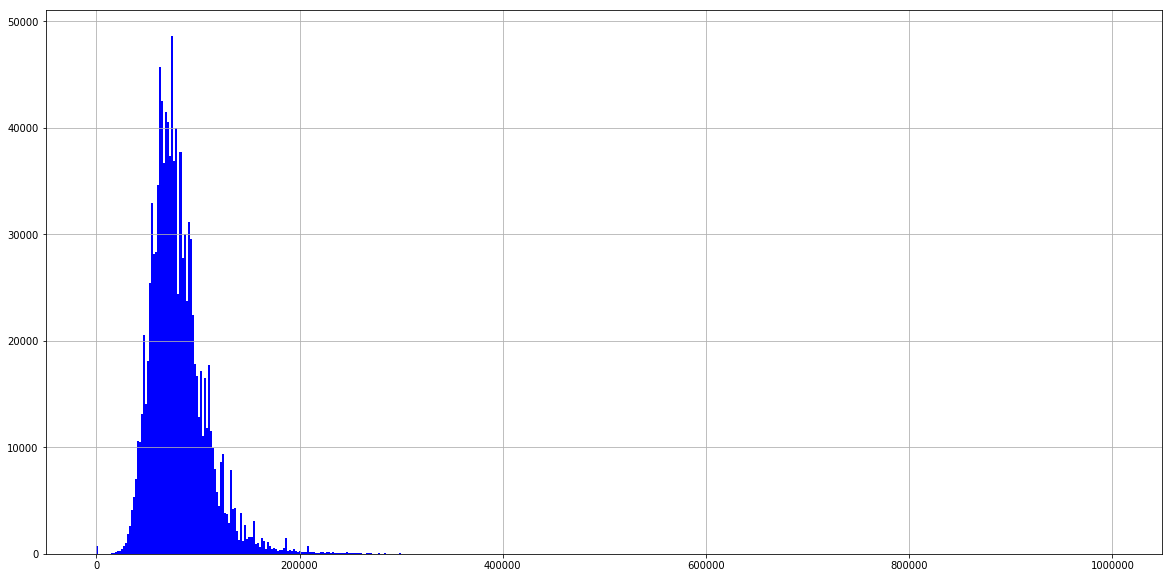

In [110]:
df["PREVAILING_WAGE"].hist(bins=500, figsize=(20,10) , color = 'b')

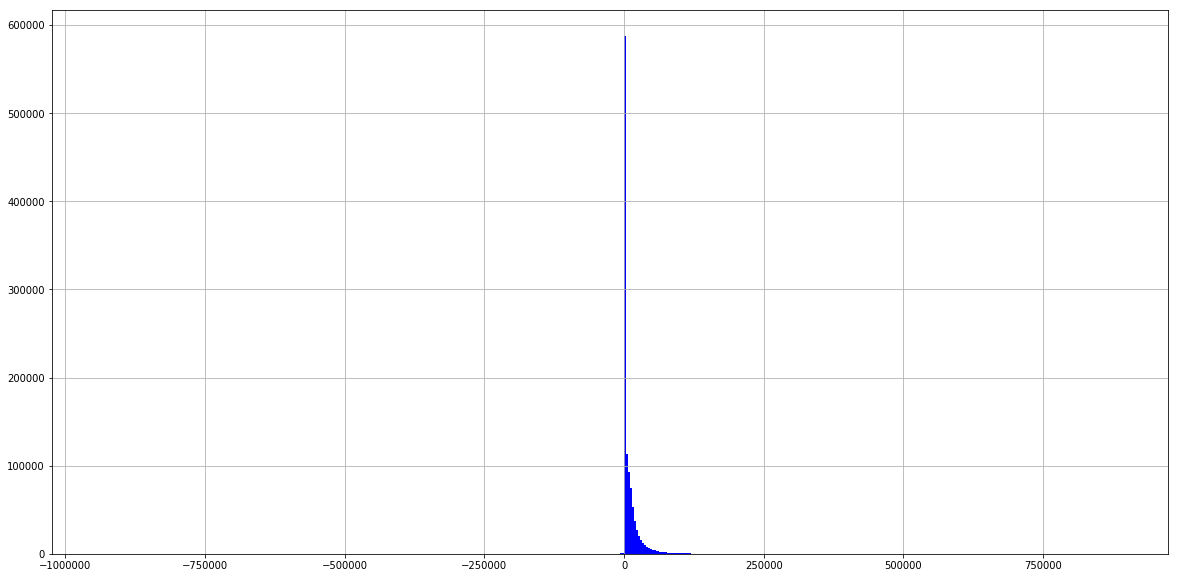

In [111]:
df["wage_diff"].hist(bins=500, figsize=(20,10) , color = 'b')

In [112]:
df["wage_diff"].mean()

9712.939684677345

In [113]:
print(df["PREVAILING_WAGE"].mean() + (df["PREVAILING_WAGE"].std() * 2))

137139.643432964


In [114]:
df = df[df["PREVAILING_WAGE"] < 300000]

In [115]:
#df = df[df["wage_diff"] >= 0]

In [116]:
#df["wage_diff"].hist(bins=500, figsize=(20,10) , color = 'b')

removed an rows with prevailing wage below 200 as these values dont make sense as it should be wage in years

In [121]:
target = df["case_status_encoded"]
df_model = df.drop("case_status_encoded", axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_model, target, test_size=0.30, random_state=42)
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

c:\users\jmeh9\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\jmeh9\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
c:\users\jmeh9\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\jmeh9\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


c:\users\jmeh9\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy : 99.039%


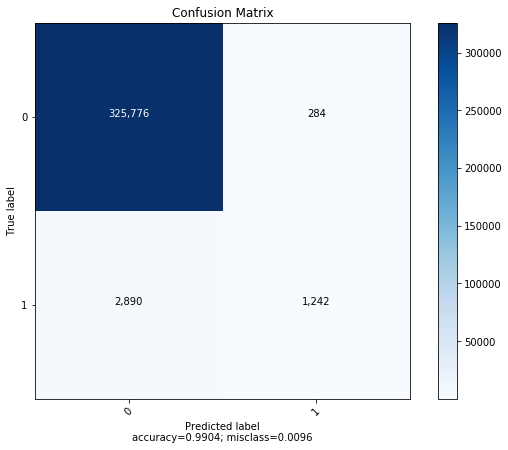

In [122]:
model = LogisticRegression()
classifier(model, X_train_scaled, X_test_scaled, y_train, y_test)